#### Step 1: Data Quality Checks

In [1]:
# import necessary library
import pandas as pd

# load the dataset
df = pd.read_csv(r"C:\Users\shwet\OneDrive\Desktop\All in one\Sachinc's ML project\ML Project\Employee dataset.csv")

# display the first few row of the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
# check the missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

#### Step 2: Exploratory Data Analysis

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# create correlation matrix
corr_matrix = df.corr(numeric_only = True)

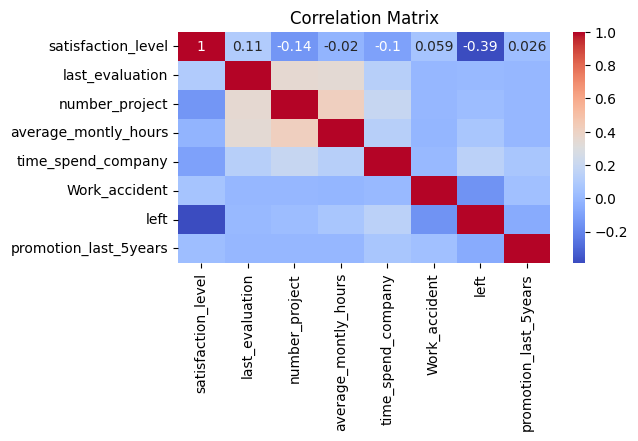

In [4]:
# plot heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

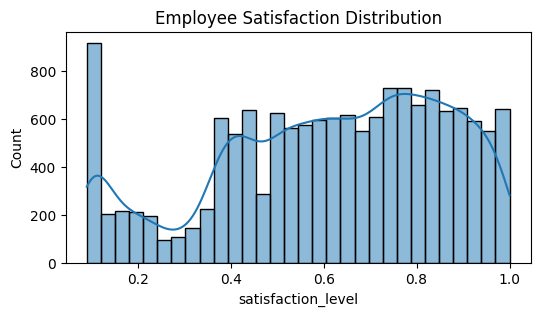

In [5]:
# plot satisfaction level distribution
plt.figure(figsize=(6,3))
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Employee Satisfaction Distribution')
plt.show()

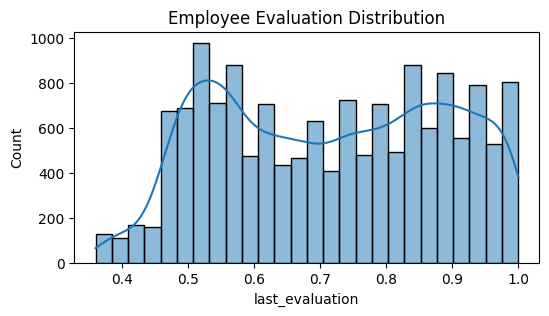

In [6]:
# Plot last evalution distribution
plt.figure(figsize=(6,3))
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Employee Evaluation Distribution')
plt.show()

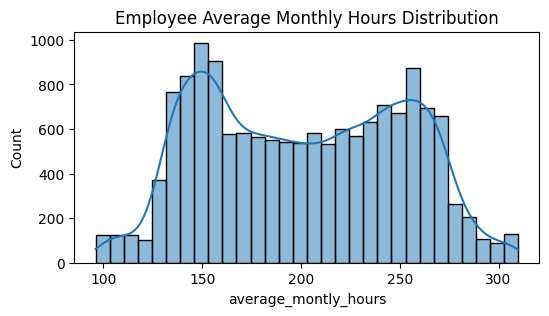

In [7]:
# plot average monthly hours distribution
plt.figure(figsize=(6,3))
sns.histplot(df['average_montly_hours'], kde=True)
plt.title('Employee Average Monthly Hours Distribution')
plt.show()

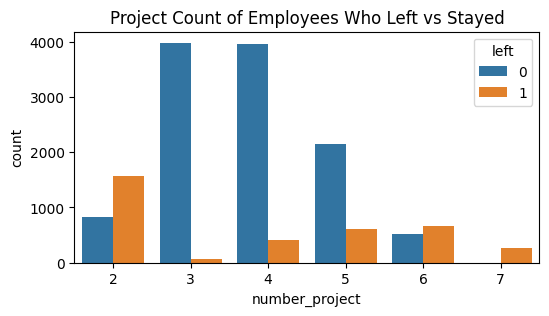

In [8]:
# Bar plot for project count and left status
plt.figure(figsize=(6,3))
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Project Count of Employees Who Left vs Stayed')
plt.show()

#### Clustering Analysis

In [9]:
# select relevent columns for clustering
cluster_df = df[['satisfaction_level', 'last_evaluation', 'left']]

# filter only employees who left
left_df = cluster_df[cluster_df['left'] == 1]

In [10]:
from sklearn.cluster import KMeans

# select the features for clustering
x = left_df[['satisfaction_level', 'last_evaluation']]

# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 123, n_init='auto')
kmeans.fit(x)

# create a copy of left_df to modifying a copy rather the original dataset
left_df = left_df.copy()

# add cluster labels to the dataframe
left_df.loc[:,'cluster'] = kmeans.labels_

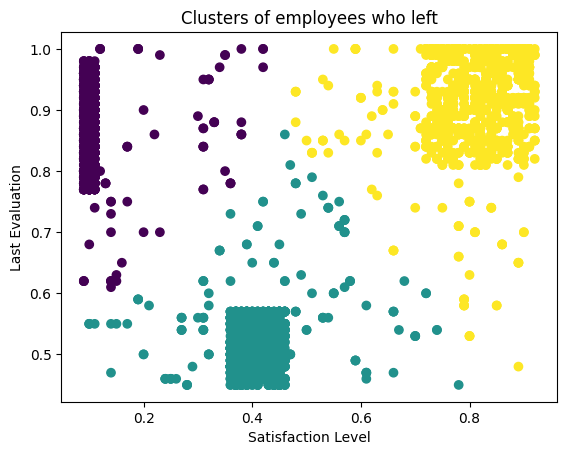

In [11]:
# plot clusters
plt.scatter(x['satisfaction_level'], x['last_evaluation'], c=left_df['cluster'], cmap='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of employees who left')
plt.show()

3.3 Interpret Clusters
Analyze the clusters to understand why employees might leave based on their satisfaction and evaluation levels.

#### Step 4.  Handle Class Imbalance Using SMOTE

In [12]:
# separate categorical and numerical columns
categorical_cols = ['sales', 'salary']
numeric_cols = df.drop(columns=categorical_cols + ['left']).columns

# apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [13]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

# features and target
x = df_encoded.drop('left', axis=1)
y = df_encoded['left']

# stratified split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)


In [14]:
# use SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

# apply smote
smote = SMOTE(random_state=123)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# check new class distribution
y_train_smote.value_counts()

0    9142
1    9142
Name: left, dtype: int64

#### Step 5. Model Training and Evalution with 5-Fold Cross-Validation

1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
y_pred_log = cross_val_predict(log_reg, x_train_smote, y_train_smote, cv=5)

# print classification report
print(classification_report(y_train_smote, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      9142
           1       0.77      0.81      0.79      9142

    accuracy                           0.79     18284
   macro avg       0.79      0.79      0.79     18284
weighted avg       0.79      0.79      0.79     18284



2. Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

# train random forest model
rf_clf = RandomForestClassifier(random_state=123)
y_pred_rf = cross_val_predict(rf_clf, x_train_smote, y_train_smote, cv=5)

# print classification report
print(classification_report(y_train_smote, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9142
           1       0.99      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284



3. Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# train gradient boosting model
gb_clf = GradientBoostingClassifier(random_state=123)
y_pred_gb = cross_val_predict(gb_clf, x_train_smote, y_train_smote, cv = 5)

# print classification report
print(classification_report(y_train_smote, y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9142
           1       0.97      0.94      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



#### Step 6. Model Comparison
compare models using ROC/AUC and confusion matrix

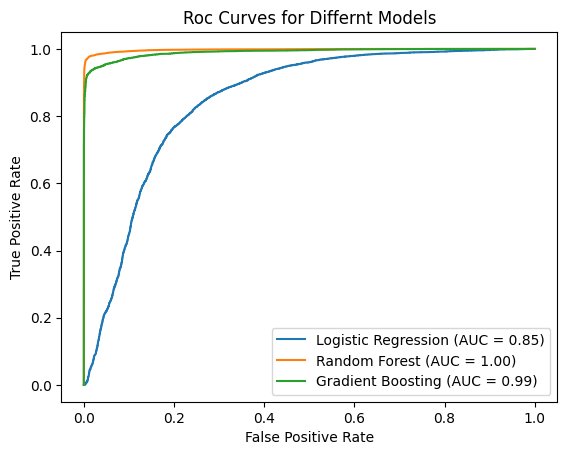

In [18]:
# plot roc curve for each model

from sklearn.metrics import roc_auc_score, roc_curve

# compute roc curve and auc for each model
models = {'Logistic Regression': log_reg, 'Random Forest': rf_clf, 'Gradient Boosting': gb_clf}
for name, model in models.items():
    y_pred_prob = cross_val_predict(model, x_train_smote, y_train_smote, cv=5, method='predict_proba')[:,1]
    fpr, tpr, _ = roc_curve(y_train_smote, y_pred_prob)
    auc = roc_auc_score(y_train_smote, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    
plt.title('Roc Curves for Differnt Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Confusion Matrix

In [19]:
# generate confusion matrix for each model to decide whether to prioitize recall or precision
from sklearn.metrics import confusion_matrix

# get confusion matrix for each model
y_pred_rf_final = cross_val_predict(rf_clf, x_train_smote, y_train_smote, cv=5)
cm = confusion_matrix(y_train_smote, y_pred_rf_final)

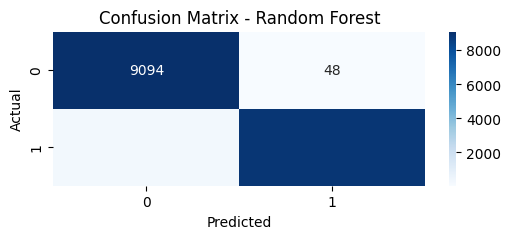

In [20]:
# plot confusion matrix
plt.figure(figsize=(6,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Step 7. Retention Strategies
Predict Turnover Probability

In [21]:
# fit the model with training data
rf_clf.fit(x_train, y_train)

# predict turnover probability on test data using the best model
y_pred_prob_test = rf_clf.predict_proba(x_test)[:, 1]

Categorize Employees into Risk Zones

In [27]:
# create zone based on the probability score
test_prob_df = pd.DataFrame({'Employee': x_test.index, 'Turnover_prob': y_pred_prob_test})
test_prob_df['Risk_Zone'] = pd.cut(test_prob_df['Turnover_prob'], bins=[0, 0.2, 0.6, 0.9, 1], labels=['safe', 'low', 'medium', 'high'])

test_prob_df.head()

,Employee,Turnover_prob,Risk_Zone
0,10627,0.00,NaN
1,2703,0.45,low
2,6059,0.00,NaN
3,3258,0.00,NaN
4,4565,0.00,NaN


#### Final Step: Save Resul to CSV

In [28]:
test_prob_df.to_csv('Employee_Turnover_Risk_Zones.csv', index=False)